<a href="https://colab.research.google.com/github/varshi-123/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

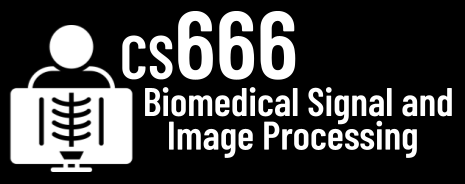

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 9.9 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE =  metadata['sampling_rate']
SECONDS = signal.shape[0] / metadata['sampling_rate']
print(SECONDS)
print(SAMPLING_RATE)

15.0
1000.0


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
from biosppy.signals import ecg
data = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
data['filtered']

array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748])

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

Text(0, 0.5, 'Values')

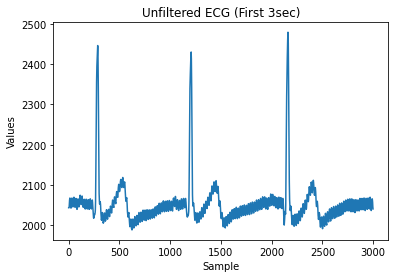

In [ ]:
import matplotlib.pyplot as plt
signal_3sec = signal[:int(3 * SAMPLING_RATE)]
plt.plot(signal_3sec)
plt.title('Unfiltered ECG (First 3sec)')
plt.xlabel('Sample')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

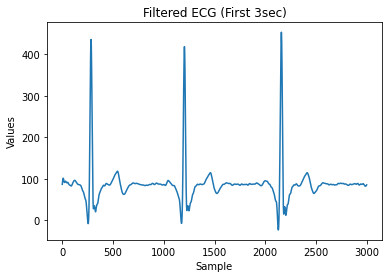

In [ ]:
plt.plot(data['filtered'][:int(3 * SAMPLING_RATE)])
plt.title('Filtered ECG (First 3sec)')
plt.xlabel('Sample')
plt.ylabel('Values')

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0.5, 0, 'time [s]')

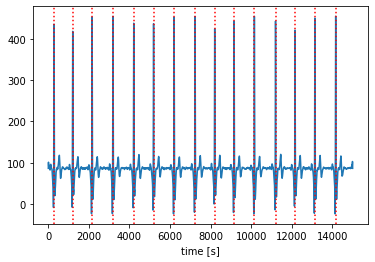

In [ ]:
plt.plot(data['filtered'])
for idx in range(len(data['rpeaks'])):
  plt.axvline(x=data['rpeaks'][idx], color='r', ls=':')
plt.xlabel('time [s]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


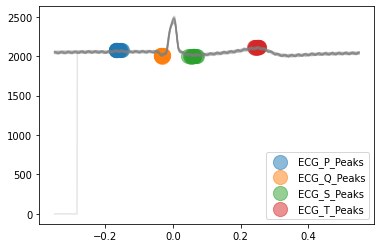

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
_, waves_peak = nk.ecg_delineate(signal, 
                                 data['rpeaks'], 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:

     # TODO Does the detection work well?

    #  Yes, it worked well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

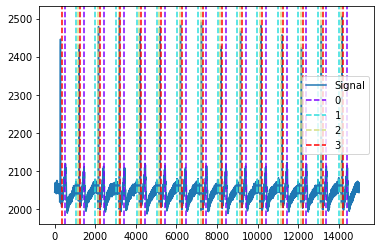

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks

_, waves_peak = nk.ecg_delineate(signal, 
                                 data['rpeaks'], 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak",
                                 show_type='peaks')

plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
out = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=5, highcut=30)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


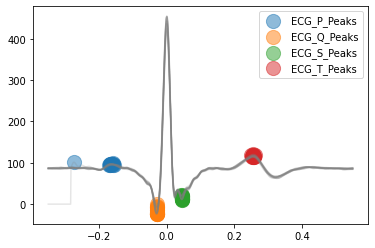

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(data['filtered'], 
                                 data['rpeaks'], 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?

# Yes, it worked well

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#